# LAB 8

# Linear Discriminant Analysis

Using GENE Dataset

In [221]:
import pandas as pd
import numpy as np

In [222]:
from sklearn.datasets import load_wine
# Loading dataset
data = load_wine()
# Converting data to a dataframe to view properly
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [223]:
y = pd.Categorical.from_codes(data.target, data.target_names)
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [224]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [225]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [226]:
df = X.join(pd.Series(y, name='target_class'))
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [227]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target_class                    0
dtype: int64

Performing LDA from scratch

In [228]:
#STEP 1: Compute the within class and between class scatter matrices

class_feature_means = pd.DataFrame(columns=data.target_names)
for c, rows in df.groupby('target_class'):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\HP\AppData\Local\Temp/ipykernel_14192/670175705.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [229]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('target_class'):
    rows = rows.drop(['target_class'], axis=1)
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)
within_class_scatter_matrix += s

In [230]:
#between class scatter matrix
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:
    n = len(df.loc[df['target_class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

C:\Users\HP\AppData\Local\Temp/ipykernel_14192/2672832363.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = df.mean()


In [231]:
#STEP 2: Compute the eigenvectors and corresponding eigenvalues for the scatter matrices.
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).
dot(between_class_scatter_matrix))

In [232]:
eigen_values

array([ 0.00000000e+00+0.00000000e+00j,  1.38324319e+02+0.00000000e+00j,
        9.21047673e-15+9.04034623e-15j,  9.21047673e-15-9.04034623e-15j,
       -1.12423131e-14+0.00000000e+00j, -2.69498848e-15+0.00000000e+00j,
       -3.84589871e-16+1.68945878e-15j, -3.84589871e-16-1.68945878e-15j,
        1.49064316e-15+0.00000000e+00j, -1.24269757e-15+0.00000000e+00j,
       -6.38759234e-16+0.00000000e+00j,  3.25231059e-16+0.00000000e+00j,
        1.70276943e-16+0.00000000e+00j])

In [233]:
eigen_vectors

array([[-9.91382656e-01+0.j        , -1.40885350e-03+0.j        ,
         1.70074852e-02-0.00176628j,  1.70074852e-02+0.00176628j,
        -1.35093999e-02+0.j        , -3.67967039e-02+0.j        ,
         5.14247354e-02+0.04855681j,  5.14247354e-02-0.04855681j,
         7.99152599e-02+0.j        ,  7.34631233e-02+0.j        ,
         3.29277273e-02+0.j        ,  2.91161139e-01+0.j        ,
         8.63135238e-01+0.j        ],
       [-1.73762845e-03+0.j        , -1.32645465e-02+0.j        ,
        -2.11963413e-02-0.034726j  , -2.11963413e-02+0.034726j  ,
         1.08754788e-01+0.j        ,  2.02249157e-02+0.j        ,
        -1.26088123e-03+0.00394708j, -1.26088123e-03-0.00394708j,
         5.83937696e-03+0.j        , -1.20469033e-02+0.j        ,
        -8.74014468e-03+0.j        ,  2.91761910e-03+0.j        ,
        -7.04171457e-03+0.j        ],
       [ 2.13909946e-02+0.j        ,  1.63292586e-01+0.j        ,
        -2.23241703e-01-0.13327974j, -2.23241703e-01+0.13327974j,


In [234]:
#STEP 3: Sort the eigenvalues and select the top k
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key = lambda x: x[0], reverse=True)
for pair in pairs:
         print(pair[0])

138.3243193654543
1.2905841375861968e-14
1.2905841375861968e-14
1.1242313147475498e-14
2.6949884790813225e-15
1.7326801005765776e-15
1.7326801005765776e-15
1.4906431618589063e-15
1.2426975654865322e-15
6.387592335745997e-16
3.2523105864918394e-16
1.7027694250202152e-16
0.0


In [235]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 1.0
Eigenvector 1: 9.330131848879444e-17
Eigenvector 2: 9.330131848879444e-17
Eigenvector 3: 8.127502957576959e-17
Eigenvector 4: 1.9483113970444593e-17
Eigenvector 5: 1.2526214540762124e-17
Eigenvector 6: 1.2526214540762124e-17
Eigenvector 7: 1.0776435905826591e-17
Eigenvector 8: 8.98394129960121e-18
Eigenvector 9: 4.617837532147844e-18
Eigenvector 10: 2.3512211022699492e-18
Eigenvector 11: 1.2309978699562442e-18
Eigenvector 12: 0.0


In [236]:
#STEP 4: Create a new matrix containing eigenvectors that map to the k eigenvalues
new_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
new_matrix

array([[-1.40885350e-03,  1.70074852e-02],
       [-1.32645465e-02, -2.11963413e-02],
       [ 1.63292586e-01, -2.23241703e-01],
       [ 3.54359291e-03, -3.72903616e-03],
       [ 5.31809703e-03, -1.10549484e-02],
       [ 1.20273964e-01, -1.53709442e-01],
       [-7.06002429e-01, -4.83118675e-01],
       [-5.90142256e-01,  3.83377956e-01],
       [ 3.81499056e-03, -1.22189107e-01],
       [ 1.90224584e-02, -3.55664715e-02],
       [-1.70510659e-01,  8.79933485e-02],
       [-2.87216275e-01,  5.91792612e-01],
       [-3.72276017e-04,  7.73859989e-04]])

In [237]:
#STEP 5: Obtain the new features (i.e. LDA components) by taking the dot product of the data
X_lda = np.array(X.dot(new_matrix))
X_lda

array([[-2.48776102, -0.84514867],
       [-2.36280116, -0.47442958],
       [-2.54701942, -1.15057676],
       [-2.65174213, -1.13387051],
       [-1.87832003, -1.41545385],
       [-2.59598142, -1.22731797],
       [-2.313191  , -0.16628812],
       [-2.14881538, -0.40412066],
       [-2.3463738 , -0.9869671 ],
       [-2.52067332, -0.82265334],
       [-2.73700151, -0.86119484],
       [-2.08521318, -0.44179552],
       [-2.3327597 , -0.58770513],
       [-2.92709081, -1.38210874],
       [-2.90375647, -1.20364851],
       [-2.22315807, -1.047814  ],
       [-2.26187074, -1.43502682],
       [-2.43107192, -1.62165564],
       [-3.04233432, -1.34421379],
       [-2.22628054, -1.21538595],
       [-2.38750076, -1.22008132],
       [-1.9668059 , -0.72047412],
       [-2.58608079, -0.27647019],
       [-2.11390158, -0.20963091],
       [-2.26845798, -0.38467562],
       [-1.97020776, -1.24966727],
       [-2.42613258, -0.64752504],
       [-1.91638634, -0.29598869],
       [-2.34810454,

In [238]:
le = LabelEncoder()
y = le.fit_transform(df['target_class'])

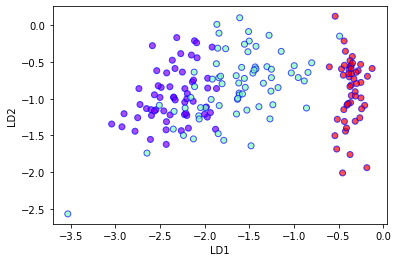

In [239]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.7,edgecolors='b')

From SKlearn

In [240]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [241]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['target_class'])

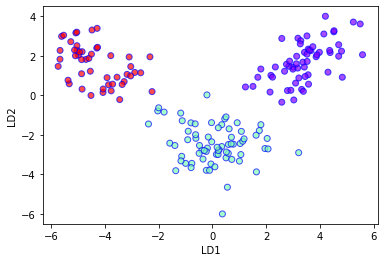

In [243]:
import matplotlib.pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.7,edgecolors='b')